#### Installation

In [1]:
!pip install pandas

In [2]:
!pip install numpy

In [210]:
!pip install tools

  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tools: filename=tools-0.1.9-py3-none-any.whl size=46729 sha256=be17204b2517954eb6220599ae547634e27185a1412550ef6314def362e983b1
  Stored in directory: /home/astechware/.cache/pip/wheels/21/c1/ce/3732acbc72a85e35b32ff9f725f0af08dad27d409e3ebfa9e0
  Created wheel for pytils: filename=pytils-0.4.1-py3-none-any.whl size=32876 sha256=6c91f09b6ce2ea8a350a6bd337add264284f1bc078b0a5d97e25cf93de985475
  Stored in directory: /home/astechware/.cache/pip/wheels/75/2a/25/dfcdc94033c8b2fed52c1525927e2d52a456343444de6bcb33
Successfully built tools pytils


#### Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#### Dataset Preprocessing:
#### 1. Data Collections
#### 2. Data Cleaning

In [ ]:
# lloading the dataset in the dataframe
# as it is table with rows, and columns 
df = pd.read_csv('train.csv')

In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Here I am printing the information of the dataframe:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- This is a more clearer count extracted out of dataframe that has less entries than 891 that are total entries for every column. 
- Keeping in view these are the columns to be taken care.

In [ ]:
print("Age has ", df['Age'].count(), "out of 891 entries")

Age has  714 out of 891 entries


In [10]:
print("Cabin has ", df['Cabin'].count(), "out of 891 entries")

Cabin has  204 out of 891 entries


In [11]:
print("Embarked has ", df['Embarked'].count(), "out of 891 entries")

Embarked has  889 out of 891 entries


##### Findings: These columns have null values
- Age (891 - 177 = 714)
- Cabin (891 - 687 = 204)
- Embarked (891 - 2 = 889)

In [ ]:
print("These are the null values sum that the columns have: ")
df.isna().sum()

These are the null values sum that the columns have: 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1. Handle the Missing Values
- Age

In [16]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
df['Age'].median()

28.0

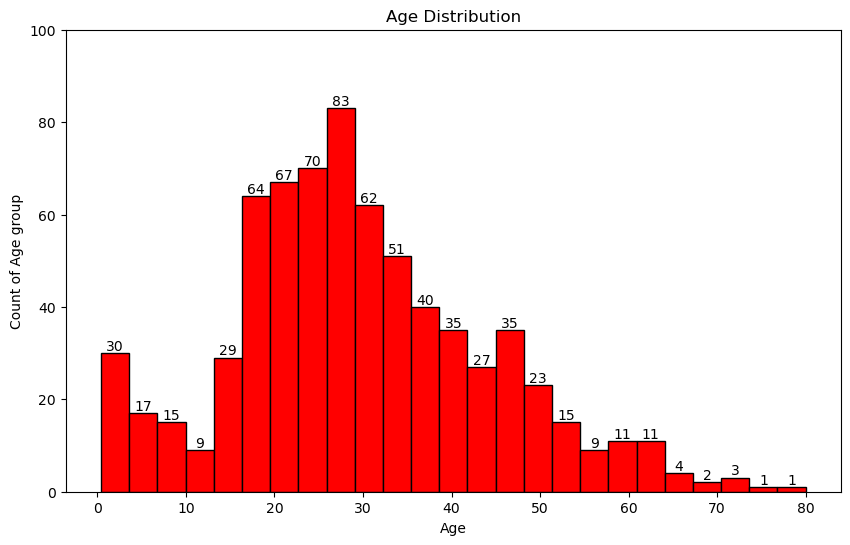

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Age Distribution')
plt.hist(x=df['Age'], bins = 25, ec='black', color='red')

# for the counts on the histogram bars
for bIN in plt.gca().patches:
    height = bIN.get_height()
    plt.text(bIN.get_x() + bIN.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('Age')
plt.ylabel('Count of Age group')
plt.ylim(0,100)
plt.show()


- Now ere u can see we can have a sort of idea that how much people belong to the specific age group.
- But lets create the categories for the people to have more better idea based on age 


In [31]:
print("Skewness:", df['Age'].skew(axis=0))

Skewness: 0.38910778230082704


In [35]:
# as the skewness value is low so that, i will use the mean to fill null values
df['Age'].fillna(df['Age'].mean(), inplace=True)

/tmp/ipykernel_40833/1619356884.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [36]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

#### Plotting the Histogram/BarChart after filling the NA values

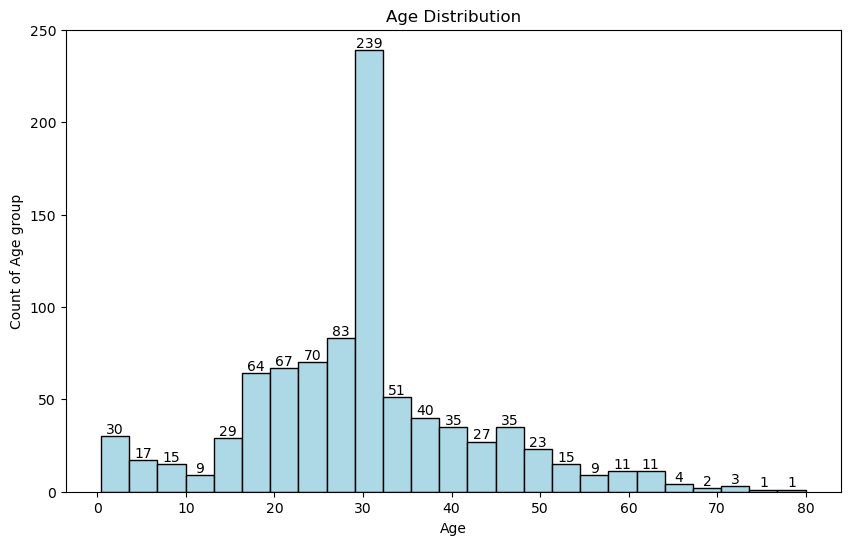

In [52]:
plt.figure(figsize=(10,6))
plt.title('Age Distribution')
plt.hist(x=df['Age'], bins = 25, ec='black', color='lightblue')

# for the counts on the histogram bars
for bIN in plt.gca().patches:
    height = bIN.get_height()
    plt.text(bIN.get_x() + bIN.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('Age')
plt.ylabel('Count of Age group')
plt.ylim(0,250)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
sex = df['Sex'].value_counts()
print(sex)

Sex
male      577
female    314
Name: count, dtype: int64


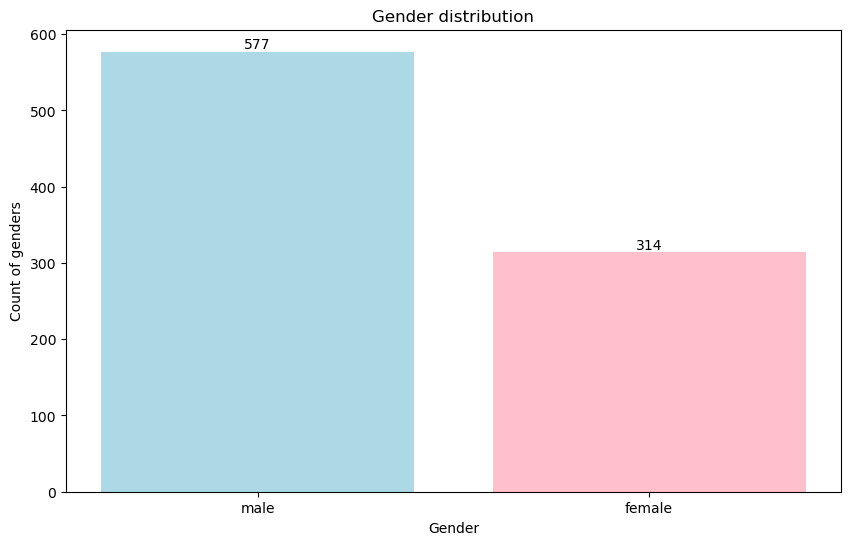

In [50]:
plt.figure(figsize=(10,6))
bars = plt.bar(sex.index, sex, color=['Lightblue', 'pink'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,2), ha='center', va='bottom')
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Count of genders')
plt.show()

In [55]:
survived = df['Survived'].value_counts()
print("0: No")
print("1: Yes")
print(survived)


0: No
1: Yes
Survived
0    549
1    342
Name: count, dtype: int64


In [70]:
# Male and Female from df['Sex'] survived according to the survived count
survived_accordinglySex_temp = df.groupby('Sex')['Survived'].value_counts()
survived_accordinglySex_temp

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [ ]:
# for better representation, I uused the unstack to move the rows to columns
survived_accordinglySex = df.groupby('Sex')['Survived'].value_counts().unstack()
survived_accordinglySex

Survived,0,1
Sex,,
female,81,233
male,468,109


<Figure size 1000x600 with 0 Axes>

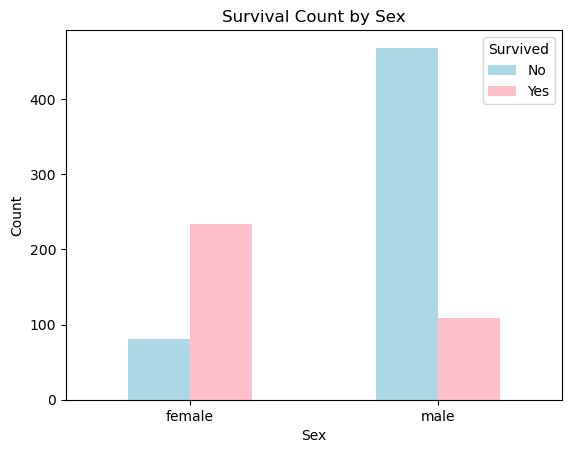

In [71]:
plt.figure(figsize=(10,6))
survived_accordinglySex.plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

#### Pie Chart with Percentage
- Now making the piechart showing the percentage of how many survived 
- Based on the gender

Total of survived, and not survived: 
 Sex
female    314
male      577
dtype: int64


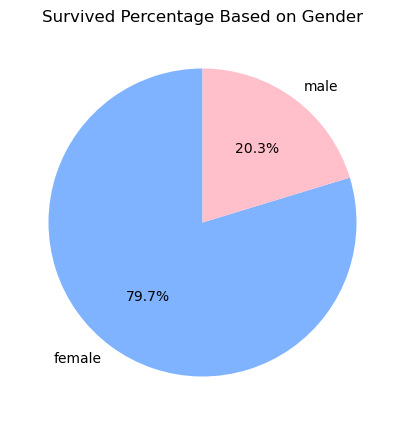

In [119]:
print("Total of survived, and not survived: \n", survived_accordinglySex.sum(axis=1))
percentages = survived_accordinglySex[1]/survived_accordinglySex.sum(axis=1)*100
plt.figure(figsize=(5,5))
colors=['#80B3FF', 'pink']
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Survived Percentage Based on Gender")
plt.show()

Total of survived, and not survived: 
 Sex
female    314
male      577
dtype: int64


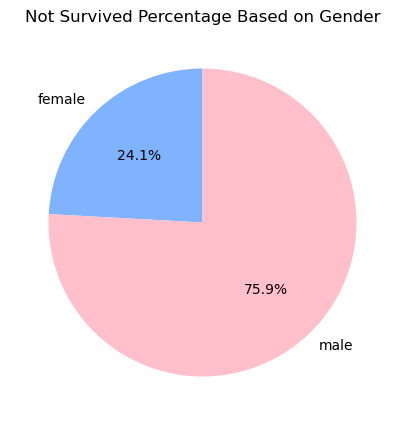

In [118]:
print("Total of survived, and not survived: \n", survived_accordinglySex.sum(axis=1))
percentages = survived_accordinglySex[0]/survived_accordinglySex.sum(axis=1)*100
plt.figure(figsize=(5,5))
colors=['#80B3FF', 'pink']
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Not Survived Percentage Based on Gender")
plt.show()

#### Bar Chart
- By Categorizing the Sex on age based on the survived people

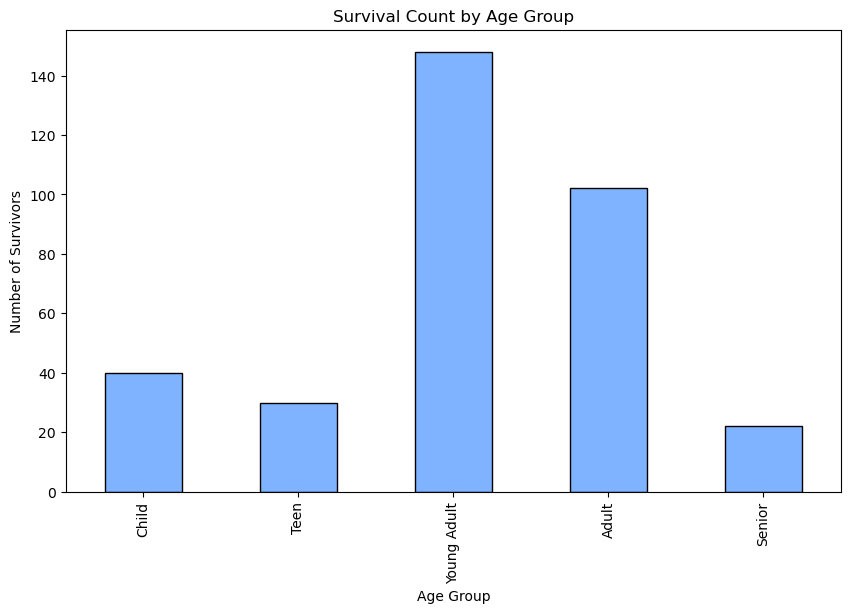

In [117]:
bins = [0, 12, 18, 30, 50, 80]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins = bins, labels=labels)

age_group_survival = df[df['Survived'] == 1]['AgeGroup'].value_counts().sort_index()
  
plt.figure(figsize=(10,6))
age_group_survival.plot(kind='bar', color='#80B3FF', edgecolor='black')
plt.xlabel("Age Group")
plt.ylabel("Number of Survivors")
plt.title("Survival Count by Age Group")
plt.show()


In [111]:
print(age_group_survival)

AgeGroup
Child           40
Teen            30
Young Adult    148
Adult          102
Senior          22
Name: count, dtype: int64


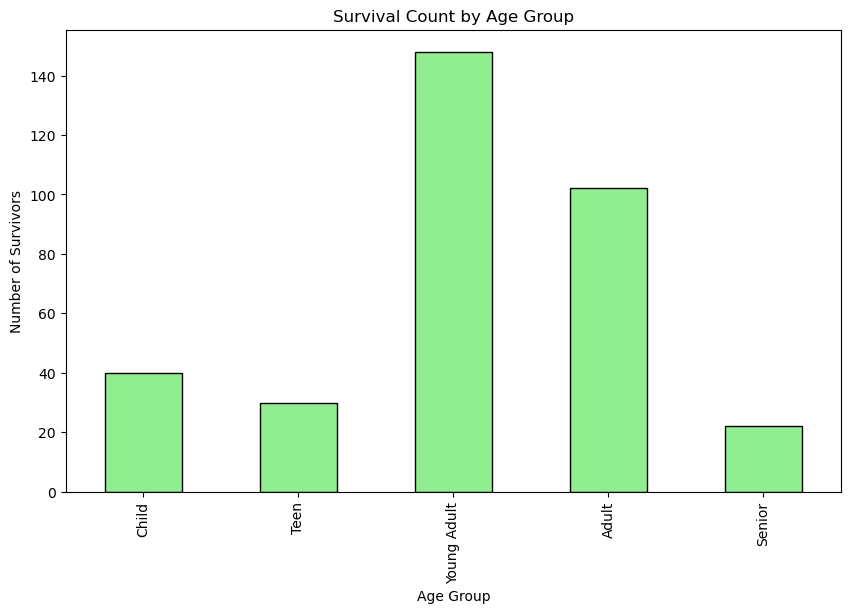

In [115]:
age_group_notSurvived = df[df['Survived'] == 0]['AgeGroup'].value_counts().sort_index()
  
plt.figure(figsize=(10,6))
age_group_survival.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.xlabel("Age Group")
plt.ylabel("Number of Survivors")
plt.title("Survival Count by Age Group")
plt.show()


In [112]:
print(age_group_notSurvived)

AgeGroup
Child           29
Teen            40
Young Adult    299
Adult          139
Senior          42
Name: count, dtype: int64


#### Now let us see the percentage of all Age Group Survived

In [120]:
age_group_survival_dict = age_group_survival.to_dict()

In [121]:
print(age_group_survival_dict)

{'Child': 40, 'Teen': 30, 'Young Adult': 148, 'Adult': 102, 'Senior': 22}


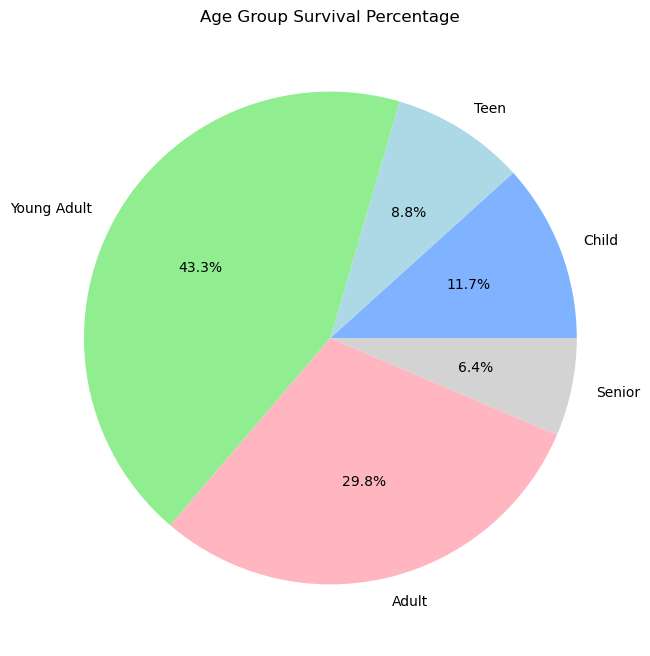

In [123]:
labels_age_group = list(age_group_survival_dict.keys())
values_age_group = list(age_group_survival_dict.values())
plt.figure(figsize=(8,8))
plt.pie(values_age_group, labels=labels_age_group, autopct='%1.1f%%', colors=['#80B3FF', 'lightblue', 'lightgreen', 'lightpink', 'lightgrey'])
plt.title("Age Group Survival Percentage")
plt.show()

- percentages of all age groups that not survived

In [124]:
age_group_notSurvived_dict = age_group_notSurvived.to_dict()
print(age_group_notSurvived_dict)

{'Child': 29, 'Teen': 40, 'Young Adult': 299, 'Adult': 139, 'Senior': 42}


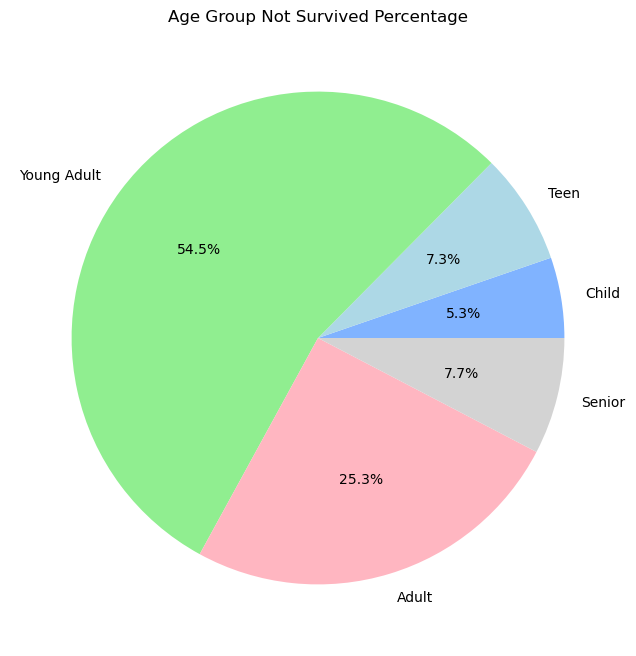

In [125]:
labels_age_group = list(age_group_notSurvived_dict.keys())
values_age_group = list(age_group_notSurvived_dict.values())
plt.figure(figsize=(8,8))
plt.pie(values_age_group, labels=labels_age_group, autopct='%1.1f%%', colors=['#80B3FF', 'lightblue', 'lightgreen', 'lightpink', 'lightgrey'])
plt.title("Age Group Not Survived Percentage")
plt.show()

#### Let's for now start cleaning the Cabin, and Embarked column.
- after that we will continue with out data analysis 
- Cabin Cleaning:

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    object  
 12  AgeGroup     891 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


In [155]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Adult


In [156]:
df['Cabin'].describe()

count         891
unique        148
top       Unknown
freq          687
Name: Cabin, dtype: object

In [157]:
df['Cabin'].value_counts()

Cabin
Unknown        687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [158]:
df[df['Cabin'] == 'B96 B98'].value_counts()

PassengerId  Survived  Pclass  Name                                       Sex     Age   SibSp  Parch  Ticket  Fare   Cabin    Embarked  AgeGroup
391          1         1       Carter, Mr. William Ernest                 male    36.0  1      2      113760  120.0  B96 B98  S         Adult       1
436          1         1       Carter, Miss. Lucile Polk                  female  14.0  1      2      113760  120.0  B96 B98  S         Teen        1
764          1         1       Carter, Mrs. William Ernest (Lucile Polk)  female  36.0  1      2      113760  120.0  B96 B98  S         Adult       1
803          1         1       Carter, Master. William Thornton II        male    11.0  1      2      113760  120.0  B96 B98  S         Child       1
Name: count, dtype: int64

In [159]:
print('Total null entries in the Cabin Column: ', df['Cabin'].isna().sum())

Total null entries in the Cabin Column:  0


In [160]:
missing_cabin = df['Cabin'].isna().sum()
percentage_missing_cabin = missing_cabin/891*100
print("Percentage of missing values in cabin column: ", percentage_missing_cabin)

Percentage of missing values in cabin column:  0.0


- as the percentage is high 77 perc!
- so we will go with approach of filling NA values with "Unknown"

In [161]:
df['Cabin'].fillna('Unknown', inplace=True)

In [162]:
print(df['Cabin'].isna().sum())

0


In [163]:
df[df['Cabin'] == 'Unknown']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S,Young Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S,Adult
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Unknown,Q,Young Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,Unknown,S,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,Unknown,S,Young Adult
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,Unknown,Q,Adult
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S,Young Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S,Young Adult


- Embarked:

In [164]:
df['Embarked'].value_counts()

Embarked
S               644
C               168
Q                77
Unknown Port      2
Name: count, dtype: int64

In [165]:
print('Number of null entries in embarked: ', df['Embarked'].isna().sum())

Number of null entries in embarked:  0


- as only 2 entries are null in embarked
- so i will replace them with unknown 

In [166]:
df['Embarked'].fillna('Unknown Port', inplace=True)

In [167]:
df[df['Embarked'] == 'Unknown Port']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,Unknown Port,Adult
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,Unknown Port,Senior


#### Continuing Data Analysis 

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    object  
 12  AgeGroup     891 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


In [182]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S,Adult
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Unknown,Q,Young Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Senior
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,Unknown,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,Unknown,S,Young Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,Unknown,C,Teen


In [ ]:
df[(df['Parch'] == 1) & (df['SibSp'] == 1)]['Name']

10                       Sandstrom, Miss. Marguerite Rut
65                              Moubarek, Master. Gerios
128                                    Peter, Miss. Anna
145                         Nicholls, Mr. Joseph Charles
172                         Johnson, Miss. Eleanor Ileen
175                               Klasen, Mr. Klas Albin
188                                     Bourke, Mr. John
193                           Navratil, Master. Michel M
248                        Beckwith, Mr. Richard Leonard
251           Strom, Mrs. Wilhelm (Elna Matilda Persson)
262                                    Taussig, Mr. Emil
279                     Abbott, Mrs. Stanton (Rosa Hunt)
312                Lahtinen, Mrs. William (Anna Sylfven)
314                                   Hart, Mr. Benjamin
319    Spedden, Mrs. Frederic Oakley (Margaretta Corn...
323    Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...
328       Goldsmith, Mrs. Frank John (Emily Alice Brown)
340                       Navra

In [187]:
df[df['Parch'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,Unknown,S,Child
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Child
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Unknown,Q,Child
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,Unknown,S,Child
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,Unknown,S,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,Unknown,S,Adult
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,Unknown,S,Child
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,Adult
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,Senior


In [199]:
print(df[df['Name'] == 'Wick, Mrs. George Dennick (Mary Hitchcock)'])


     PassengerId  Survived  Pclass  \
856          857         1       1   

                                           Name     Sex   Age  SibSp  Parch  \
856  Wick, Mrs. George Dennick (Mary Hitchcock)  female  45.0      1      1   

    Ticket      Fare    Cabin Embarked AgeGroup  
856  36928  164.8667  Unknown        S    Adult  


In [218]:

filtered_df = df[df['Name'].str.contains("Wick")]

print(filtered_df)

     PassengerId  Survived  Pclass  \
318          319         1       1   
856          857         1       1   

                                           Name     Sex   Age  SibSp  Parch  \
318                    Wick, Miss. Mary Natalie  female  31.0      0      2   
856  Wick, Mrs. George Dennick (Mary Hitchcock)  female  45.0      1      1   

    Ticket      Fare    Cabin Embarked AgeGroup  
318  36928  164.8667       C7        S    Adult  
856  36928  164.8667  Unknown        S    Adult  


#### Male, Female Survivor/ Not Survivor Count for each Embarkment

In [223]:
gender_wise_port_pickup = df.groupby('Sex')['Embarked'].value_counts()

gender_wise_port_pickup

Sex     Embarked    
female  S               203
        C                73
        Q                36
        Unknown Port      2
male    S               441
        C                95
        Q                41
Name: count, dtype: int64

In [222]:
# for better representation, I uused the unstack to move the rows to columns
# survived_accordinglySex = df.groupby('Sex')['Survived'].value_counts().unstack()
survived_accordinglySex

Survived,0,1
Sex,,
female,81,233
male,468,109


In [ ]:
female_survived = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]
female_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,Unknown,S,Young Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,Unknown,C,Teen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,Unknown,C,Young Adult
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,Unknown,C,Teen
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,Senior
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,Unknown,S,Young Adult


In [ ]:
female_survived_embarked= female_survived.groupby('Embarked').size()
female_survived_embarked

Embarked
C                64
Q                27
S               140
Unknown Port      2
dtype: int64

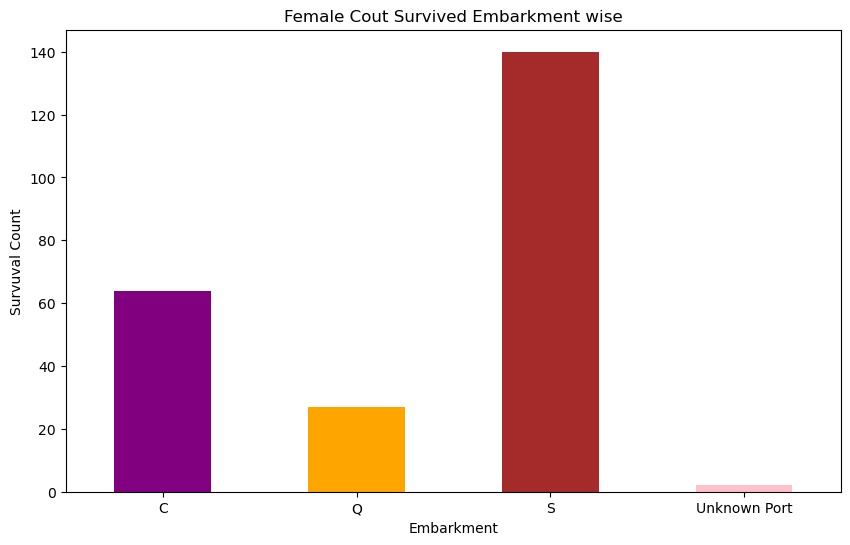

In [258]:
colors = ['purple', 'orange', 'brown', 'pink', 'gray']
plt.figure(figsize=(10,6))
female_survived_embarked.plot(kind='bar', color=colors)
plt.title('Female Cout Survived Embarkment wise')
plt.xlabel('Embarkment')
plt.ylabel('Survuval Count')
plt.xticks(rotation=0)
plt.show()



In [247]:
male_survived = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]
male_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,Unknown,S,Young Adult
21,22,1,2,"Beesley, Mr. Lawrence",male,34.000000,0,0,248698,13.0000,D56,S,Adult
23,24,1,1,"Sloper, Mr. William Thompson",male,28.000000,0,0,113788,35.5000,A6,S,Young Adult
36,37,1,3,"Mamee, Mr. Hanna",male,29.699118,0,0,2677,7.2292,Unknown,C,Young Adult
55,56,1,1,"Woolner, Mr. Hugh",male,29.699118,0,0,19947,35.5000,C52,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.000000,0,0,1601,56.4958,Unknown,S,Adult
839,840,1,1,"Marechal, Mr. Pierre",male,29.699118,0,0,11774,29.7000,C47,C,Young Adult
857,858,1,1,"Daly, Mr. Peter Denis",male,51.000000,0,0,113055,26.5500,E17,S,Senior
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.000000,1,1,347742,11.1333,Unknown,S,Child


In [248]:
male_survived_embarked = male_survived.groupby('Embarked').size()
male_survived_embarked

Embarked
C    29
Q     3
S    77
dtype: int64

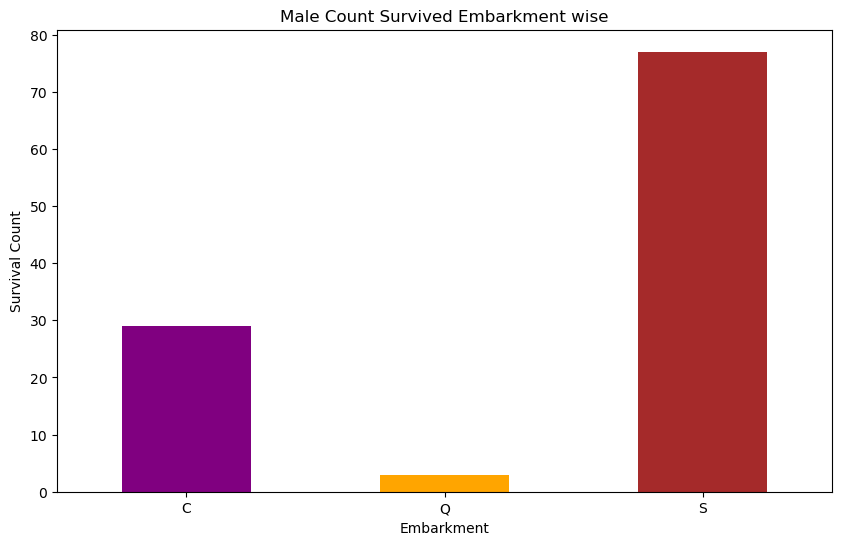

In [309]:

colors = ['purple', 'orange', 'brown', 'pink', 'gray']

plt.figure(figsize=(10,6))
male_survived_embarked.plot(kind='bar', color=colors)
plt.title('Male Count Survived Embarkment wise')
plt.xlabel('Embarkment')
plt.ylabel('Survival Count')
plt.xticks(rotation=0)
plt.show()


#### Ticket wise distribution over Embarkment for Every Class

In [261]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S,Adult
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Unknown,Q,Young Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Senior
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,Unknown,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,Unknown,S,Young Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,Unknown,C,Teen


In [260]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [279]:
class_embarkment = df[(df['Pclass'].isin([1,2,3])) & (df['Embarked'] == 'S')]
class_embarkment

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S,Young Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.000000,0,0,C.A./SOTON 34068,10.5000,Unknown,S,Young Adult
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,Unknown,S,Young Adult
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Young Adult


In [308]:
one = df[(df['Pclass'] == 1) & (df['Embarked'] == 'S')]
one.value_counts()

PassengerId  Survived  Pclass  Name                                          Sex     Age        SibSp  Parch  Ticket      Fare      Cabin    Embarked  AgeGroup   
4            1         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000  1      0      113803      53.1000   C123     S         Adult          1
603          0         1       Harrington, Mr. Charles H                     male    29.699118  0      0      113796      42.4000   Unknown  S         Young Adult    1
691          1         1       Dick, Mr. Albert Adrian                       male    31.000000  1      0      17474       57.0000   B20      S         Adult          1
690          1         1       Madill, Miss. Georgette Alexandra             female  15.000000  0      1      24160       211.3375  B5       S         Teen           1
672          0         1       Davidson, Mr. Thornton                        male    31.000000  1      0      F.C. 12750  52.0000   B71      S         Adult         

In [307]:
two = df[(df['Pclass'] == 2) & (df['Embarked'] == 'S')]
two.value_counts()

PassengerId  Survived  Pclass  Name                                                 Sex     Age   SibSp  Parch  Ticket        Fare   Cabin    Embarked  AgeGroup   
16           1         2       Hewlett, Mrs. (Mary D Kingcome)                      female  55.0  0      0      248706        16.00  Unknown  S         Senior         1
552          0         2       Sharp, Mr. Percival James R                          male    27.0  0      0      244358        26.00  Unknown  S         Young Adult    1
571          1         2       Harris, Mr. George                                   male    62.0  0      0      S.W./PP 752   10.50  Unknown  S         Senior         1
577          1         2       Garside, Miss. Ethel                                 female  34.0  0      0      243880        13.00  Unknown  S         Adult          1
581          1         2       Christy, Miss. Julie Rachel                          female  25.0  1      1      237789        30.00  Unknown  S         Young Ad

In [306]:
three = df[(df['Pclass'] == 3) & (df['Embarked'] == 'S')]
three.value_counts()

PassengerId  Survived  Pclass  Name                                                       Sex     Age        SibSp  Parch  Ticket              Fare     Cabin    Embarked  AgeGroup   
1            0         3       Braund, Mr. Owen Harris                                    male    22.000000  1      0      A/5 21171           7.2500   Unknown  S         Young Adult    1
434          0         3       Kallio, Mr. Nikolai Erland                                 male    17.000000  0      0      STON/O 2. 3101274   7.1250   Unknown  S         Teen           1
612          0         3       Jardin, Mr. Jose Neto                                      male    29.699118  0      0      SOTON/O.Q. 3101305  7.0500   Unknown  S         Young Adult    1
611          0         3       Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)  female  39.000000  1      5      347082              31.2750  Unknown  S         Adult          1
607          0         3       Karaic, Mr. Milan                 

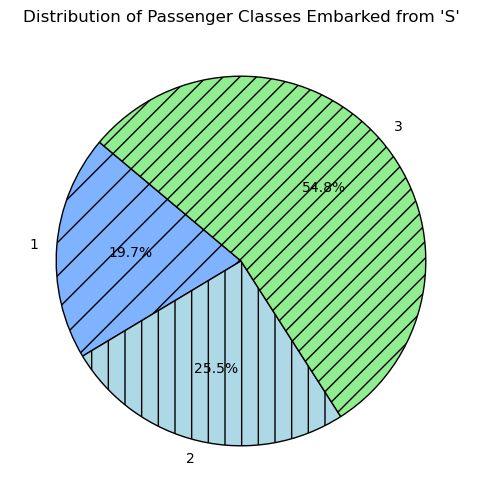

In [287]:
class_counts = class_embarkment['Pclass'].value_counts().sort_index()

hatch_pattern = ['/', '|', "//"]

fig,ax = plt.subplots(figsize=(8,6))
wedges, text, autotext = ax.pie(
    class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['#80B3FF', 'lightblue', 'lightgreen', 'lightpink', 'lightgrey'],
    wedgeprops={'edgecolor': 'black'}, 
    startangle=140
)

for i, wedge in enumerate(wedges):
    wedge.set_hatch(hatch_pattern[i])

ax.set_title("Distribution of Passenger Classes Embarked from 'S'")

plt.show()

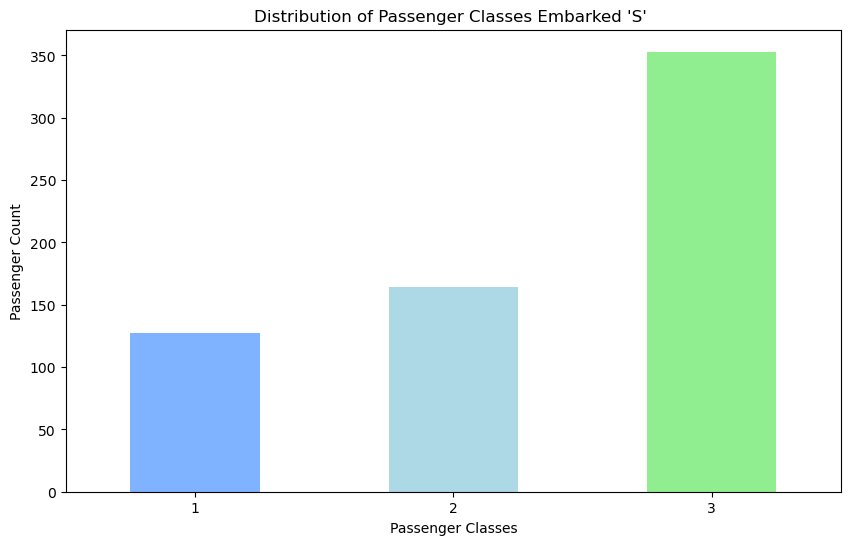

In [ ]:
plt.figure(figsize=(10,6))
class_counts.plot(kind='bar', color=['#80B3FF', 'lightblue', 'lightgreen', 'lightpink', 'lightgrey'])
plt.title("Distribution of Passenger Classes Embarked 'S' ")
plt.xlabel('Passenger Classes')
plt.ylabel('Passenger Count')
plt.xticks(rotation=0)
plt.show()


#### Fare Distribution Passenger Class wise on Embarkment
- point to be noted here difference between groupby, and by in box plot
- groupby is a list on which different aggregate functions like mean, median mode can be performed
- by is do this automatically

In [337]:
fare = df.groupby('Embarked')['Fare']
type(fare)

pandas.core.groupby.generic.SeriesGroupBy

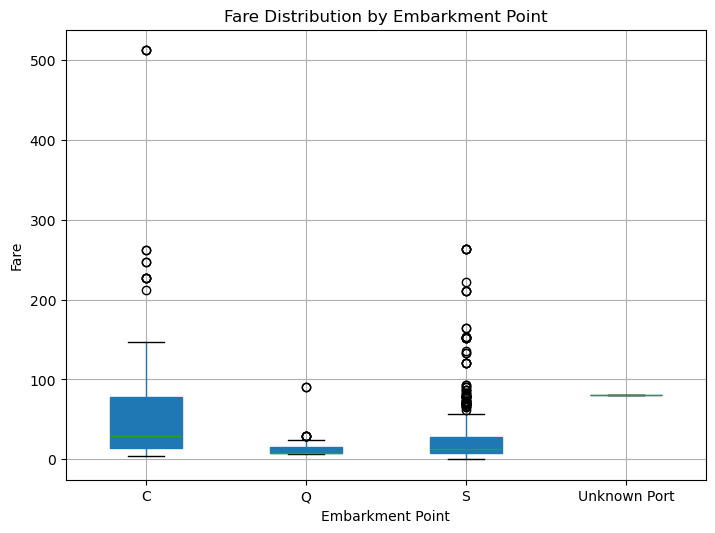

In [344]:
fig, ax = plt.subplots(figsize=(8,6))
box = df.boxplot(column='Fare', by='Embarked' ,ax=ax, patch_artist=True)
ax.set_title("Fare Distribution by Embarkment Point")
ax.set_xlabel("Embarkment Point")
ax.set_ylabel("Fare")
plt.suptitle("") 

# Show plot
plt.show()